# Imports

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [231]:
df = pd.read_csv("amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [232]:
print("Columns:",df.columns)


Columns: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


### Column names and data types

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [234]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [235]:
df.rating.value_counts().tail(7)

rating
2.8    2
2.3    1
|      1
2      1
3      1
2.6    1
2.9    1
Name: count, dtype: int64

There is a "|" that makes the rating being a Object, not float. Let's remove this row

### Data cleaning

In [236]:
# Remove extra symbols and convert to numeric values
df["discounted_price"] = df["discounted_price"].astype(str).str.replace("₹","").str.replace(",","")
df["actual_price"] = df["actual_price"].astype(str).str.replace("₹","").str.replace(",","")
df["discounted_price"]=pd.to_numeric(df["discounted_price"],errors = "coerce")
df["actual_price"]=pd.to_numeric(df["actual_price"],errors = "coerce")

df["discount_percentage"] = df["discount_percentage"].astype(str).str.replace("%","")
df["discount_percentage"]=pd.to_numeric(df["discount_percentage"],errors = "coerce")

df["rating"] = df["rating"].astype(str).str.replace("|","")
df["rating"]=pd.to_numeric(df["rating"],errors = "coerce")

df["rating_count"] = df["rating_count"].astype(str).str.replace(",","")
df["rating_count"]=pd.to_numeric(df["rating_count"],errors = "coerce")

In [237]:
# handling missing values
df["rating_count"]= df["rating_count"].fillna(df["rating_count"].median())
df['rating']= df['rating'].fillna(df['rating'].median())

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [239]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.096587,18277.634812
std,6944.304394,10874.826864,21.635905,0.291574,42727.398216
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1191.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17325.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [240]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


# Constants

In [230]:
QUANTITATIVE_COLS = [
    'rating', 
    'rating_count', 
    'discounted_price', 
    'actual_price', 
    'discount_percentage'
]


### Distribution of Data

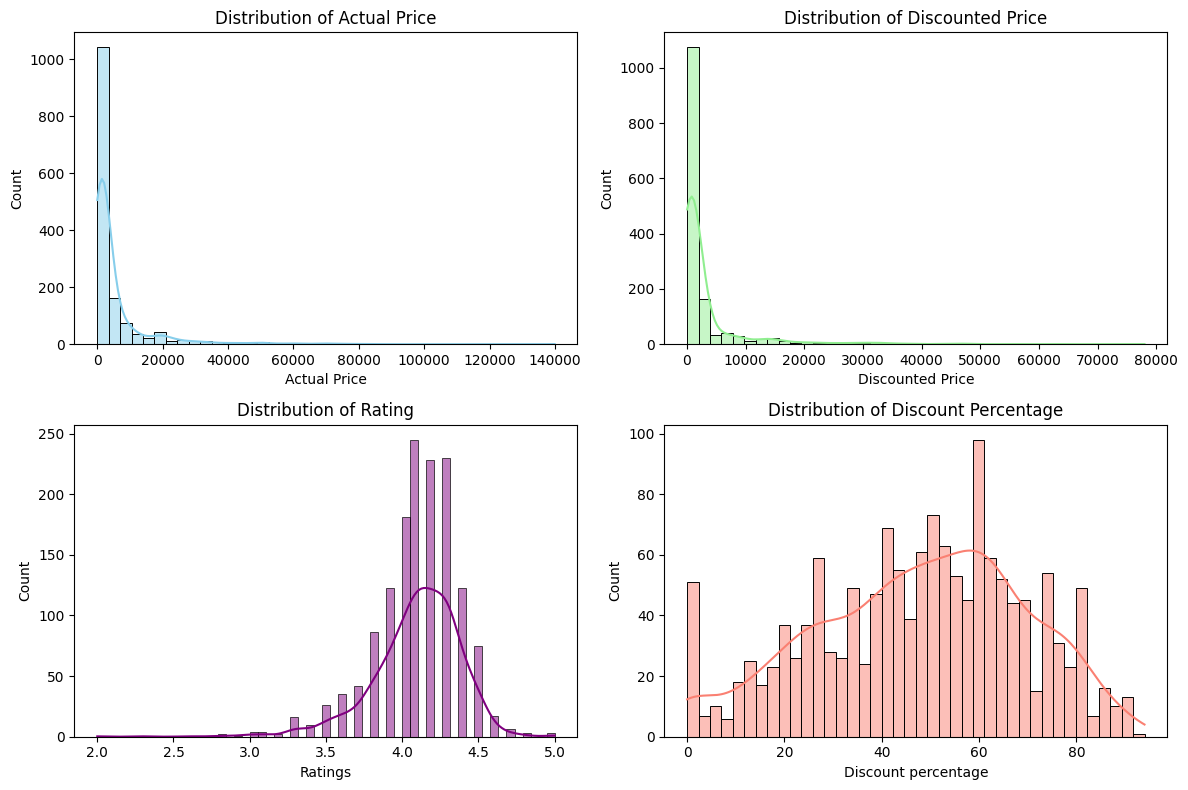

In [241]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram 1
sns.histplot(df["actual_price"], bins=40, kde=True, color="skyblue", ax=axes[0,0])
axes[0,0].set_title("Distribution of Actual Price")
axes[0,0].set_xlabel("Actual Price")
axes[0,0].set_ylabel("Count")
# Histogram 2
sns.histplot(df["discounted_price"], bins=40, kde=True, color="lightgreen", ax=axes[0,1])
axes[0,1].set_title("Distribution of Discounted Price")
axes[0,1].set_xlabel("Discounted Price")
axes[0,1].set_ylabel("Count")

# Histogram 3
sns.histplot(df["rating"], kde=True, color="purple", ax=axes[1,0])
axes[1,0].set_title("Distribution of Rating")
axes[1,0].set_xlabel("Ratings")
axes[1,0].set_ylabel("Count")

#Histogram 4
sns.histplot(df["discount_percentage"], bins=40, kde=True, color="salmon", ax=axes[1,1])
axes[1,1].set_title("Distribution of Discount Percentage")
axes[1,1].set_xlabel("Discount percentage")
axes[1,1].set_ylabel("Count")


plt.tight_layout()
plt.show()

We can see that rating is very skewed to the right. values seem to be mostly bewteen 3.7 and 4.6

## Correlations

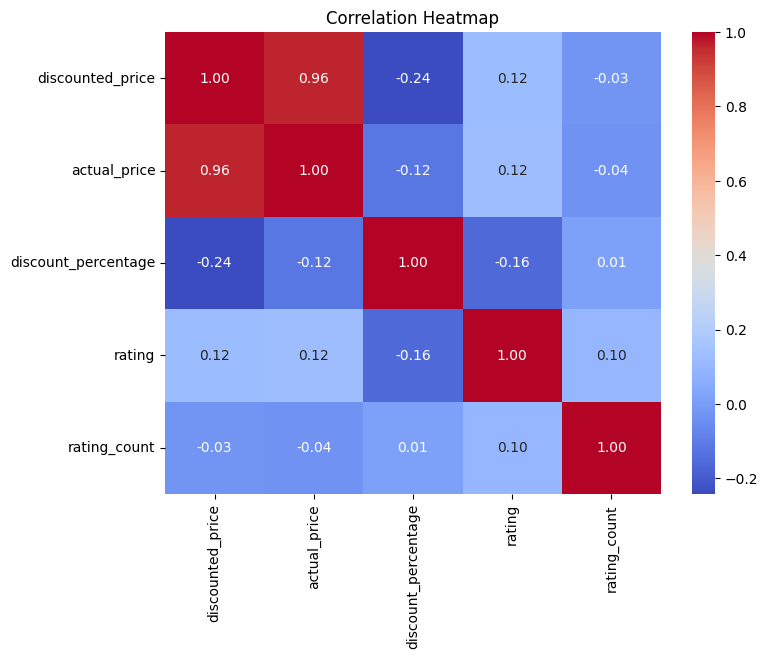

In [242]:
plt.figure(figsize=(8,6))
corr = df[['discounted_price','actual_price','discount_percentage','rating','rating_count']].corr()
sns.heatmap(corr, annot=True,  fmt=".2f",cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Category extraction

In [243]:
def extract_category_levels(series:pd.Series, separator:str='|') -> pd.DataFrame:
   
    # Split categories by separator
    split_categories = series.str.split(separator)
    
    # Initialize dictionary to store levels
    levels = {
        'category_level_1': [],
        'category_level_2': [],
        'category_level_3': [],
        'category_level_4': [],
        'category_level_5': []
    }
    
    # Extract each level
    
    for categories in split_categories:
        # Ensure we have at least 5 None values
        level_values = categories
        # Pad with None to ensure 5 levels
        level_values = (list(level_values) + [None] * 5)[:5]
        
        for i in range(5):
            levels[f'category_level_{i+1}'].append(level_values[i] if i < len(level_values) else None)
    
    # Create DataFrame
    df = pd.DataFrame(levels)
    
    return df

In [244]:
categories_df = extract_category_levels(df['category'])
df_with_categories = pd.concat([df, categories_df], axis=1)

In [265]:
categories_df.columns

Index(['category_level_1', 'category_level_2', 'category_level_3',
       'category_level_4', 'category_level_5'],
      dtype='object')

In [245]:
df_with_categories.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'category_level_1',
       'category_level_2', 'category_level_3', 'category_level_4',
       'category_level_5'],
      dtype='object')

In [246]:
def analyze_categories(df, category_col) -> None:
  
    unique_count = df[category_col].nunique()
    total_count = len(df)
    value_counts = df[category_col].value_counts()
    top_categories = value_counts.head(10).to_dict()
    
    result = {
        'unique_categories': unique_count,
        'total_records': total_count,
        'top_10_categories': top_categories,
        'value_counts': value_counts
    }
    
    print(f"Category analysis for '{category_col}':")
    print(f"  Total unique categories: {unique_count}")
    print(f"  Total records: {total_count}")
    print(f"\n  Top 10 categories by frequency:")
    for cat, count in list(top_categories.items())[:10]:
        print(f"    {cat}: {count}")

In [247]:
analyze_categories(df_with_categories, 'category_level_1')

Category analysis for 'category_level_1':
  Total unique categories: 9
  Total records: 1465

  Top 10 categories by frequency:
    Electronics: 526
    Computers&Accessories: 453
    Home&Kitchen: 448
    OfficeProducts: 31
    MusicalInstruments: 2
    HomeImprovement: 2
    Toys&Games: 1
    Car&Motorbike: 1
    Health&PersonalCare: 1


In [248]:
analyze_categories(df_with_categories[df_with_categories['category_level_1'] == "Computers&Accessories"], 'category_level_2')

Category analysis for 'category_level_2':
  Total unique categories: 8
  Total records: 453

  Top 10 categories by frequency:
    Accessories&Peripherals: 381
    NetworkingDevices: 34
    ExternalDevices&DataStorage: 18
    Printers,Inks&Accessories: 11
    Components: 5
    Monitors: 2
    Tablets: 1
    Laptops: 1


In [249]:
analyze_categories(df_with_categories[df_with_categories['category_level_2'] == "Accessories&Peripherals"], 'category_level_3')

Category analysis for 'category_level_3':
  Total unique categories: 12
  Total records: 381

  Top 10 categories by frequency:
    Cables&Accessories: 240
    Keyboards,Mice&InputDevices: 60
    LaptopAccessories: 34
    PCGamingPeripherals: 15
    TabletAccessories: 8
    Audio&VideoAccessories: 7
    USBGadgets: 5
    USBHubs: 5
    HardDiskBags: 3
    Adapters: 2


In [250]:
df_with_categories.groupby(['category_level_1', 'category_level_3'])[QUANTITATIVE_COLS].mean()

rating  rating_count  \
category_level_1      category_level_3                                   
Car&Motorbike         InteriorAccessories       3.800000   1118.000000   
Computers&Accessories Adapters                  4.150000   2983.000000   
                      Audio&VideoAccessories    3.885714   9845.142857   
                      Cables&Accessories        4.152500  15050.662500   
                      DataCards&Dongles         3.800000  11213.000000   
...                                                  ...           ...   
HomeImprovement       CordManagement            4.500000   5985.000000   
MusicalInstruments    Condenser                 3.900000  44441.000000   
OfficeProducts        Calculators               4.450000   7743.750000   
                      Paper                     4.288889   4396.296296   
Toys&Games            Drawing&PaintingSupplies  4.300000  15867.000000   

                                                discounted_price  \
category_level_1      category_level_3                             
Car&Motorbike         InteriorAccessories            2339.000000   
Computers&Accessories Adapters                        221.500000   
                      Audio&VideoAccessories         1025.000000   
                      Cables&Accessories              357.160917   
                      DataCards&Dongles              2099.000000   
...                                                          ...   
HomeImprovement       CordManagement                  249.000000   
MusicalInstruments    Condenser                       638.000000   
OfficeProducts        Calculators                     698.000000   
                      Paper                           242.851852   
Toys&Games            Drawing&PaintingSupplies        150.000000   

                                                actual_price  \
category_level_1      category_level_3                         
Car&Motorbike         InteriorAccessories        4000.000000   
Computers&Accessories Adapters                   2699.000000   
                      Audio&VideoAccessories     2054.571429   
                      Cables&Accessories          905.822167   
                      DataCards&Dongles          3250.000000   
...                                                      ...   
HomeImprovement       CordManagement              599.000000   
MusicalInstruments    Condenser                  1347.000000   
OfficeProducts        Calculators                 705.000000   
                      Paper                       351.592593   
Toys&Games            Drawing&PaintingSupplies    150.000000   

                                                discount_percentage  
category_level_1      category_level_3                               
Car&Motorbike         InteriorAccessories                 42.000000  
Computers&Accessories Adapters                            78.500000  
                      Audio&VideoAccessories              47.142857  
                      Cables&Accessories                  59.720833  
                      DataCards&Dongles                   35.000000  
...                                                             ...  
HomeImprovement       CordManagement                      58.000000  
MusicalInstruments    Condenser                           46.000000  
OfficeProducts        Calculators                          1.250000  
                      Paper                               14.000000  
Toys&Games            Drawing&PaintingSupplies             0.000000  

[72 rows x 5 columns]

In [251]:
categories = df_with_categories['category_level_1'].unique()
categories

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [252]:
df_with_categories["category_level_3"].unique()

array(['Cables&Accessories', 'NetworkAdapters', 'Accessories',
       'Televisions', 'Projectors', 'SatelliteEquipment',
       'MediaStreamingDevices', 'AVReceivers&Amplifiers', 'Speakers',
       'SmartWatches', 'MobileAccessories', 'Smartphones&BasicMobiles',
       'MemoryCards', 'Headphones', 'LaptopAccessories', 'Adapters',
       'PenDrives', 'Keyboards,Mice&InputDevices', 'Condenser',
       'DisposableBatteries', 'Paper', 'Scrapbooking',
       'ExternalHardDisks', 'VideoCameras', 'Calculators',
       'Repeaters&Extenders', 'Inks,Toners&Cartridges',
       'PCGamingPeripherals', 'PaintingMaterials', 'HardDiskBags',
       'Flashes', None, 'Routers', 'RechargeableBatteries', 'USBGadgets',
       'SecurityCameras', 'TabletAccessories', 'USBHubs',
       'Audio&VideoAccessories', 'ExternalMemoryCardReaders', 'Memory',
       'UninterruptedPowerSupplies', 'Cases', 'Adapters&Multi-Outlets',
       'InternalSolidStateDrives', 'DataCards&Dongles',
       'DrawingMaterials', 'Interna

In [253]:
for category in categories:
    print(category)
    df_cat = df_with_categories[df_with_categories['category_level_1'] == category]
    grouped_by = df_cat.groupby('category_level_3')[QUANTITATIVE_COLS].mean()
    display(grouped_by.head())

Computers&Accessories


,rating,rating_count,discounted_price,actual_price,discount_percentage
category_level_3,,,,,
Adapters,4.150000,2983.000000,221.500000,2699.000000,78.500000
Audio&VideoAccessories,3.885714,9845.142857,1025.000000,2054.571429,47.142857
Cables&Accessories,4.152500,15050.662500,357.160917,905.822167,59.720833
DataCards&Dongles,3.800000,11213.000000,2099.000000,3250.000000,35.000000
ExternalHardDisks,4.400000,35518.666667,3516.833333,4642.666667,27.000000


Electronics


,rating,rating_count,discounted_price,actual_price,discount_percentage
category_level_3,,,,,
AVReceivers&Amplifiers,4.000000,897.000000,1990.000000,3100.000000,36.000000
Accessories,3.997938,23479.948454,498.329897,1244.092784,56.927835
Adapters,3.900000,6491.000000,120.000000,999.000000,88.000000
Cases,4.300000,15032.000000,119.000000,499.000000,76.000000
DisposableBatteries,4.414286,12007.000000,327.428571,388.428571,14.285714


MusicalInstruments


,rating,rating_count,discounted_price,actual_price,discount_percentage
category_level_3,,,,,
Condenser,3.9,44441.0,638.0,1347.0,46.0


OfficeProducts


,rating,rating_count,discounted_price,actual_price,discount_percentage
category_level_3,,,,,
Calculators,4.450000,7743.750000,698.000000,705.000000,1.25
Paper,4.288889,4396.296296,242.851852,351.592593,14.00


Home&Kitchen


,rating,rating_count,discounted_price,actual_price,discount_percentage
category_level_3,,,,,
AirConditioners,4.300000,3231.000000,42990.000000,75990.000000,43.000000
AirPurifiers,4.275000,3517.250000,11917.000000,27113.250000,41.000000
"Coffee,Tea&Espresso",4.006667,1969.266667,928.800000,1355.466667,41.933333
DrawingMaterials,4.350000,7877.000000,94.500000,99.500000,5.000000
Fans,4.088235,8793.294118,1902.461176,3041.705882,36.352941


HomeImprovement


,rating,rating_count,discounted_price,actual_price,discount_percentage
category_level_3,,,,,
Adapters&Multi-Outlets,4.0,2581.0,425.0,999.0,57.0
CordManagement,4.5,5985.0,249.0,599.0,58.0


Toys&Games


,rating,rating_count,discounted_price,actual_price,discount_percentage
category_level_3,,,,,
Drawing&PaintingSupplies,4.3,15867.0,150.0,150.0,0.0


Car&Motorbike


,rating,rating_count,discounted_price,actual_price,discount_percentage
category_level_3,,,,,
InteriorAccessories,3.8,1118.0,2339.0,4000.0,42.0


Health&PersonalCare


,rating,rating_count,discounted_price,actual_price,discount_percentage
category_level_3,,,,,
HealthMonitors,4.0,3663.0,899.0,1900.0,53.0


## Pre-processing

In [322]:
df_simple = df_with_categories[["actual_price", "discounted_price", "category_level_3"]].copy()
df_simple.dropna(subset=["actual_price", "discounted_price"], inplace=True)

In [323]:
df_simple.columns.to_list()

['actual_price', 'discounted_price', 'category_level_3']

Handle category_level_3

In [324]:
# Choose top10 categories
top30 = df_simple["category_level_3"].value_counts().nlargest(30).index
df_simple["category_level_3"] = np.where(
    df_simple["category_level_3"].isin(top30),
    df_simple["category_level_3"],
    "__Other__")

In [325]:
df_simple["category_level_3"].value_counts()

category_level_3
Cables&Accessories             240
SmallKitchenAppliances         181
Accessories                     97
__Other__                       92
MobileAccessories               84
Vacuum,Cleaning&Ironing         82
Smartphones&BasicMobiles        77
SmartWatches                    76
Televisions                     69
Headphones                      62
Keyboards,Mice&InputDevices     60
RoomHeaters                     46
WaterHeaters&Geysers            44
LaptopAccessories               34
Paper                           27
WaterPurifiers&Accessories      26
NetworkAdapters                 20
Fans                            17
LaundryOrganization             16
PCGamingPeripherals             15
Coffee,Tea&Espresso             15
MemoryCards                     14
Speakers                        13
PenDrives                       10
Routers                          9
TabletAccessories                8
Audio&VideoAccessories           7
DisposableBatteries              7
Ext

In [326]:
# Create dummy columns (0/1 for each category)
cat_dummies = pd.get_dummies(df_simple["category_level_3"], prefix="cat3")

In [327]:
# Add these dummy columns to the main DataFrame
df_simple = pd.concat([df_simple, cat_dummies], axis=1)

In [328]:
df_simple.head()

,actual_price,discounted_price,category_level_3,cat3_Accessories,cat3_Audio&VideoAccessories,cat3_Cables&Accessories,"cat3_Coffee,Tea&Espresso",cat3_DisposableBatteries,cat3_ExternalHardDisks,cat3_Fans,...,cat3_SmallKitchenAppliances,cat3_SmartWatches,cat3_Smartphones&BasicMobiles,cat3_Speakers,cat3_TabletAccessories,cat3_Televisions,"cat3_Vacuum,Cleaning&Ironing",cat3_WaterHeaters&Geysers,cat3_WaterPurifiers&Accessories,cat3___Other__
0,1099.0,399.0,Cables&Accessories,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,349.0,199.0,Cables&Accessories,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1899.0,199.0,Cables&Accessories,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,699.0,329.0,Cables&Accessories,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,399.0,154.0,Cables&Accessories,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Machine Learning

#### Train/test split

In [329]:
# Define features (X) and target (y)
FEATURES = ["actual_price"] + list(cat_dummies.columns)
X = df_simple[FEATURES]
y = df_simple["discounted_price"]

In [330]:
# Split into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Linear Regression

In [331]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [332]:
print("Train R^2:", round(model.score(X_train, y_train),3))
print("Test  R^2:", round(model.score(X_test, y_test),3))

Train R^2: 0.947
Test  R^2: 0.94


In [347]:
df_simple.loc[481, ['actual_price', 'category_level_3']]


actual_price                         19499.0
category_level_3    Smartphones&BasicMobiles
Name: 481, dtype: object

In [349]:
y_test[481]

np.float64(13999.0)

In [343]:
# Example product
new = pd.DataFrame({"actual_price": [19499], "category_level_3": ["Smartphones&BasicMobiles"]})

# Handle category encoding (same way as before)
new["category_level_3"] = np.where(
    new["category_level_3"].isin(top30),
    new["category_level_3"],
    "__Other__"
)

new_dummies = pd.get_dummies(new["category_level_3"], prefix="cat3")
new_dummies = new_dummies.reindex(columns=cat_dummies.columns, fill_value=0)

new_final = pd.concat([new[["actual_price"]], new_dummies], axis=1)

predicted_price = model.predict(new_final)
print(f"Predicted discounted price: {predicted_price[0]:.2f}")


Predicted discounted price: 14674.06
